In [1]:
import csv
from dataclasses import dataclass

import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook

In [2]:
@dataclass
class Huis:
    ketel_efficientie: float
    gevel_oppervlak: float
    gevel_isolatiewaarde: float
    dak_oppervlak: float
    dak_isolatiewaarde: float

    @property
    def isolatiewaarde(self) -> float:
        muur = self.gevel_oppervlak * self.gevel_isolatiewaarde / 40
        dak = self.dak_oppervlak * self.dak_isolatiewaarde / 50
        return muur * dak * self.ketel_efficientie

In [3]:
with open("../data/woningen.csv") as f:
    reader = csv.DictReader(f)
    huizen = [
        Huis(
            ketel_efficientie=float(d["Effiecientie ketel"]),
            gevel_oppervlak=float(d["Geveloppervlak"]),
            gevel_isolatiewaarde=float(d["Isolatiewaarde gevel"]),
            dak_oppervlak=float(d["Dakoppervlak"]),
            dak_isolatiewaarde=float(d["Isolatiewaarde dak"]),
        )
        for d in reader
    ]

In [4]:
huizen

[Huis(ketel_efficientie=0.655120737, gevel_oppervlak=40.29, gevel_isolatiewaarde=0.623063804, dak_oppervlak=54.5, dak_isolatiewaarde=0.574111204),
 Huis(ketel_efficientie=0.866875899, gevel_oppervlak=59.99, gevel_isolatiewaarde=0.322039309, dak_oppervlak=56.3, dak_isolatiewaarde=0.440626585),
 Huis(ketel_efficientie=0.548452953, gevel_oppervlak=61.38, gevel_isolatiewaarde=0.395743331, dak_oppervlak=54.5, dak_isolatiewaarde=0.588558061),
 Huis(ketel_efficientie=0.562744271, gevel_oppervlak=33.77, gevel_isolatiewaarde=0.547790131, dak_oppervlak=52.0, dak_isolatiewaarde=0.405286477),
 Huis(ketel_efficientie=0.648915521, gevel_oppervlak=33.77, gevel_isolatiewaarde=0.326543874, dak_oppervlak=52.0, dak_isolatiewaarde=0.306530001),
 Huis(ketel_efficientie=0.544167889, gevel_oppervlak=84.13, gevel_isolatiewaarde=0.550184601, dak_oppervlak=52.0, dak_isolatiewaarde=0.463377569),
 Huis(ketel_efficientie=0.726138339, gevel_oppervlak=36.86, gevel_isolatiewaarde=0.506722185, dak_oppervlak=56.3, dak_

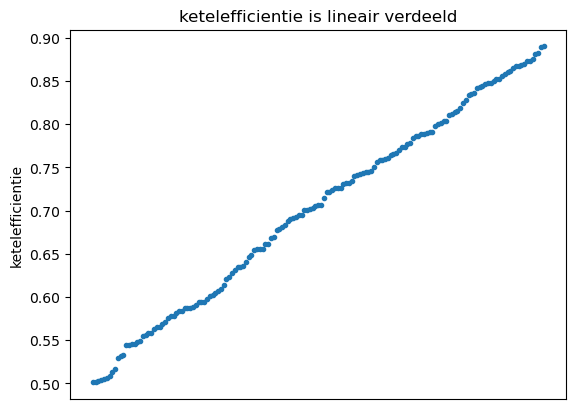

In [5]:
plt.plot(sorted([huis.ketel_efficientie for huis in huizen]), ".")
plt.xticks([])
plt.ylabel("ketelefficientie")
plt.title("ketelefficientie is lineair verdeeld");

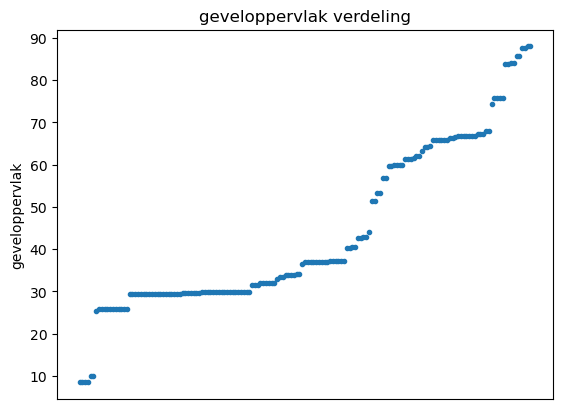

In [6]:
plt.plot(sorted([huis.gevel_oppervlak for huis in huizen]), ".")
plt.xticks([])
plt.ylabel("geveloppervlak")
plt.title("geveloppervlak verdeling");

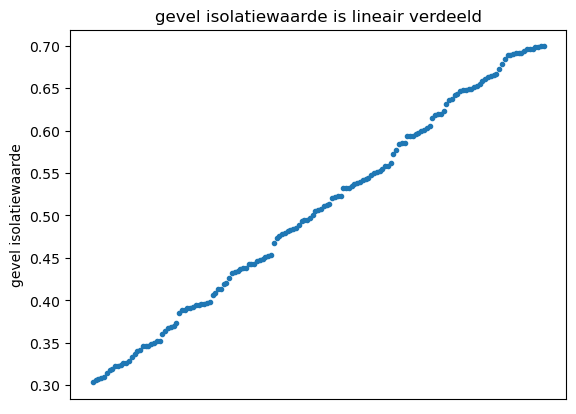

In [7]:
plt.plot(sorted([huis.gevel_isolatiewaarde for huis in huizen]), ".")
plt.xticks([])
plt.ylabel("gevel isolatiewaarde")
plt.title("gevel isolatiewaarde is lineair verdeeld");

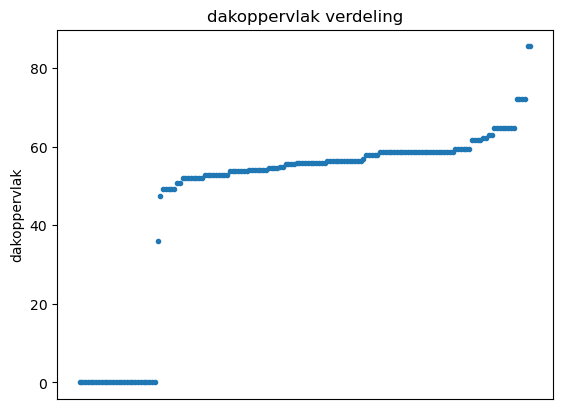

In [8]:
plt.plot(sorted([huis.dak_oppervlak for huis in huizen]), ".")
plt.xticks([])
plt.ylabel("dakoppervlak")
plt.title("dakoppervlak verdeling");

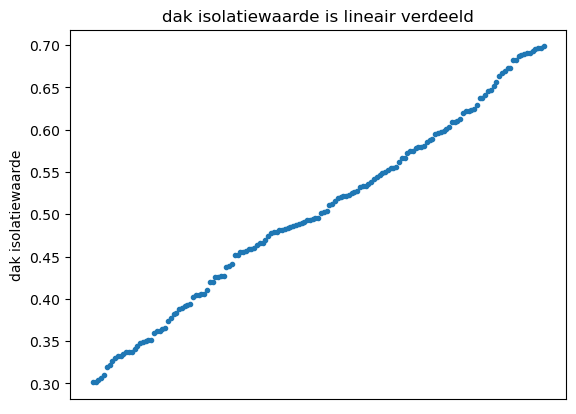

In [9]:
plt.plot(sorted([huis.dak_isolatiewaarde for huis in huizen]), ".")
plt.xticks([])
plt.ylabel("dak isolatiewaarde")
plt.title("dak isolatiewaarde is lineair verdeeld");

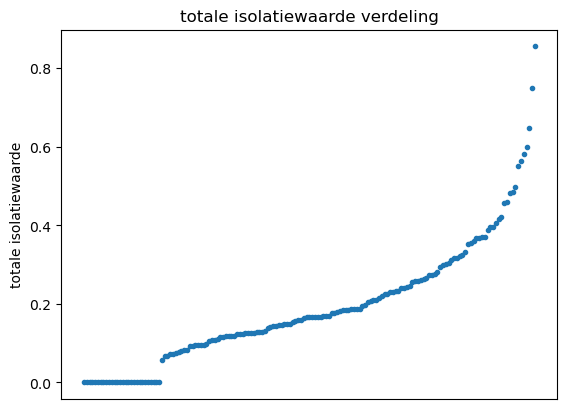

In [10]:
plt.plot(sorted([huis.isolatiewaarde for huis in huizen]), ".")
plt.xticks([])
plt.ylabel("totale isolatiewaarde")
plt.title("totale isolatiewaarde verdeling");

De verdeling van de totale isolatiewaarde lijkt op het eerste gezicht kwadratisch of exponentieel.

Een ander iets dat opvalt is dat er waarden van nul tussen zitten. Dat komt doordat sommige dakoppervlakwaardes nul zijn. Dit lijkt geen fout te zijn, deze waardes komen ook in de csv voor. Ik neem aan dat dit appartementen op een beneden- of middenverdieping zijn.